# Lab 1: Become A Quant

## Goal
- This lab is an exercise after you have read the second lecture **Data Acquisition, Visualization, and Backtesting**.
- Now it is your turn to redo the same procedure as follows:
    - First collect the data of one stock which you are interested in.
    - Then investigate the data by drawing some plots.
    - Develope a possible trading strategy so that you could make a positive profit in the end.
    - Draw a plot for your profit and make a performance report, which shows the annualized return rate, the Sharpe ratio, the Sortino ratio, and MDD, at least.
    - Also compare your strategy to the buy-and-hold strategy.
        - Your strategy should beat the buy-and-hold strategy, which is the easiest way in the market.

In [1]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}

In [24]:
%matplotlib inline

### Step 1: Data Collection
- I suggest that you could use the useful package **ffn** to collect the daily price of stocks.
    - https://pmorissette.github.io/ffn/
        - By default, the data is downloaded from Yahoo! Finance and the Adjusted Close is used as the security’s price.
        - Other data sources are also available and you may select other fields as well.
        - Fields are specified by using the following format: {ticker}:{field}. So, if we want to get the Open, High, Low, Close for aapl, we would do the following:
        ```python
        ffn.get("aapl:Open,aapl:High,aapl:Low,aapl:Close", start = "2010-01-01", end = "2014-01-01")
        ```
- Note that you could collect the prices of the US stocks, say Apple (the tick symbol: aapl), directly using **ffn**.
    - You may look for the tick symbol for the specific company here: https://finance.yahoo.com/.
    - For example, the tick symbol for S&P500 is ^GSPC; 台灣加權指數 ^TWII.
- Feel free to use the data you could access, for example, the daily traded volumes of stocks.

In [2]:
# The command below is used to install ffn if your environment hasn't installed it.
!pip install ffn 

  Created wheel for ffn: filename=ffn-0.3.4-cp36-none-any.whl size=22813 sha256=aee7136882332279ffa34789b676de9d27f070419c82c9c8073dc4a069404a78
  Stored in directory: /root/.cache/pip/wheels/20/08/4d/921180e81279d147cb6399fe1e194f2c67a796df86f9f4c5fe
Successfully built ffn


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import ffn

#select a stock, here I would like to trade random Nasdaq penny stocks
portfolio = ffn.get("FCEL,MARK,XELA", start = "2014-01-01" )
portfolio.rebase().plot( grid = True )

/usr/local/lib/python3.6/dist-packages/ffn/core.py:27: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


### Step 2: Data Visualization

In [5]:
#see the bollinger band and RSI index 
!pip install ta
!pip install matplotlib
!pip install pandas
import ta as ta 
from ta.volatility import BollingerBands
import pandas as pd


  Created wheel for ta: filename=ta-0.5.25-cp36-none-any.whl size=24880 sha256=2872b4d5dd4d587a53a1440b65edac6d268afae8865a046c9b214cf07788c8c6
  Stored in directory: /root/.cache/pip/wheels/2e/93/b7/cf649194508e53cee4145ffb949e9f26877a5a8dd12db9ed5b
Successfully built ta


In [ ]:
print(portfolio)

                  fcel  mark     xela  fcel_bb_bbm  fcel_bb_bbh  fcel_bb_bbl
Date                                                                        
2014-01-02  207.360001  5.01  10.1000          NaN          NaN          NaN
2014-01-03  243.360001  4.95  10.1000          NaN          NaN          NaN
2014-01-06  231.839996  4.90  10.1000          NaN          NaN          NaN
2014-01-07  267.839996  4.95  10.1000          NaN          NaN          NaN
2014-01-08  243.360001  5.10  10.1000          NaN          NaN          NaN
...                ...   ...      ...          ...          ...          ...
2020-08-25    2.880000  1.15   0.4543       2.7100     3.202260     2.217740
2020-08-26    2.940000  1.11   0.4380       2.7420     3.205879     2.278121
2020-08-27    2.950000  1.10   0.4521       2.7750     3.197635     2.352365
2020-08-28    2.990000  1.14   0.4516       2.8130     3.163263     2.462737
2020-08-31    2.840000  1.12   0.4279       2.8275     3.156369     2.498631

In [6]:
return_rates = portfolio.diff() / portfolio * 100
return_rates = portfolio.pct_change()
return_rates.iloc[:,0:3].plot(grid = True, figsize = (20,10))


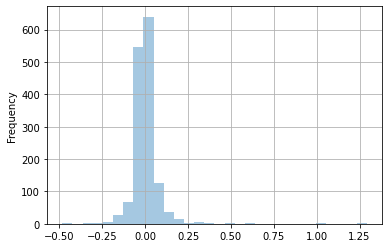

In [ ]:
return_rates["fcel"].plot.hist(alpha = 0.4, grid = True, bins=30)

In [12]:

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close = portfolio["fcel"], n = 20, ndev = 2)


# Add Bollinger Bands features
portfolio['fcel_bb_bbm'] = indicator_bb.bollinger_mavg()
portfolio['fcel_bb_bbh'] = indicator_bb.bollinger_hband()
portfolio['fcel_bb_bbl'] = indicator_bb.bollinger_lband()

In [10]:
#RSi 
portfolio["fcel_rsi"] = ta.momentum.rsi(portfolio["fcel"], n=14, fillna=False)

In [13]:
#plot bb
plt.figure(figsize = (12, 6))
plt.subplot(211)
plt.plot( portfolio[["fcel", 'fcel_bb_bbm', 'fcel_bb_bbh', 'fcel_bb_bbl']],linestyle = "--")
plt.grid(True)

#plot RSI 
plt.figure(figsize = (12, 6))
plt.subplot(212)
plt.plot( portfolio["fcel_rsi"])
plt.grid(True)


### Step 3: Development of Trading Strategy
- Try to find a profitable strategy.
- You may consider these trading strategies common in the market: https://www.investopedia.com/terms/t/technical-analysis-of-stocks-and-trends.asp
    - Use the package **ta** (https://github.com/bukosabino/ta) or **ta-lib** (https://github.com/mrjbq7/ta-lib)
    - A quick tutorial for **talib**: [用 Python 快速計算 158 種技術指標！](https://medium.com/ai%E8%82%A1%E4%BB%94/%E7%94%A8-python-%E5%BF%AB%E9%80%9F%E8%A8%88%E7%AE%97-158-%E7%A8%AE%E6%8A%80%E8%A1%93%E6%8C%87%E6%A8%99-26f9579b8f3a)
- I offer you one simple strategy as follows.

In [14]:
print(portfolio[["fcel","fcel_bb_bbm","fcel_bb_bbh","fcel_bb_bbl","fcel_rsi"]])

                  fcel  fcel_bb_bbm  fcel_bb_bbh  fcel_bb_bbl   fcel_rsi
Date                                                                    
2014-01-02  207.360001          NaN          NaN          NaN        NaN
2014-01-03  243.360001          NaN          NaN          NaN        NaN
2014-01-06  231.839996          NaN          NaN          NaN        NaN
2014-01-07  267.839996          NaN          NaN          NaN        NaN
2014-01-08  243.360001          NaN          NaN          NaN        NaN
...                ...          ...          ...          ...        ...
2020-08-27    2.950000       2.7750     3.197635     2.352365  56.221526
2020-08-28    2.990000       2.8130     3.163263     2.462737  57.472424
2020-08-31    2.840000       2.8275     3.156369     2.498631  51.526629
2020-09-01    2.900000       2.8455     3.147790     2.543210  53.594692
2020-09-02    2.670000       2.8510     3.135809     2.566191  45.568881

[1494 rows x 5 columns]


In [255]:
from ffn.utils import clean_ticker

target = "plan"
name = clean_ticker(target);
#creat all value needed for trading 
asset = ffn.get(target, start = "2012-01-01")
# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close = asset[target], n = 20, ndev = 2)

# Add Bollinger Bands features
asset['bb_bbm'] = indicator_bb.bollinger_mavg()
asset['bb_bbh'] = indicator_bb.bollinger_hband()
asset['bb_bbl'] = indicator_bb.bollinger_lband()
#RSi 
asset["rsi"] = ta.momentum.rsi(asset[name], n=14, fillna=False)



In [256]:
asset['MACD'] = ta.trend.macd(asset[name])
print(asset['MACD'])

Date
2018-10-12         NaN
2018-10-15         NaN
2018-10-16         NaN
2018-10-17         NaN
2018-10-18         NaN
                ...   
2020-08-27    2.431079
2020-08-28    3.116896
2020-08-31    3.587585
2020-09-01    4.014392
2020-09-02    4.208906
Name: MACD, Length: 476, dtype: float64


In [257]:
#here I am testing long position only 
#create a long position if stand on bollinger band middle line or if RSI < 30 (overreaction)
shift_up = (asset[name].shift(2) < asset['bb_bbm'].shift(2)) & (asset[name].shift(1) > asset['bb_bbm'].shift(1) ) & (asset['MACD'] <= 0 )
buy_signal = (asset["rsi"] < 30) | shift_up
#sell if pass the upper bond of bollinger band, and RSI > 75 (overreaction)
pass_uper = (asset[name] > asset['bb_bbh'] ) & (asset['MACD'] > 0 )
sell_signal = (asset["rsi"] > 75) & pass_uper



# Plot

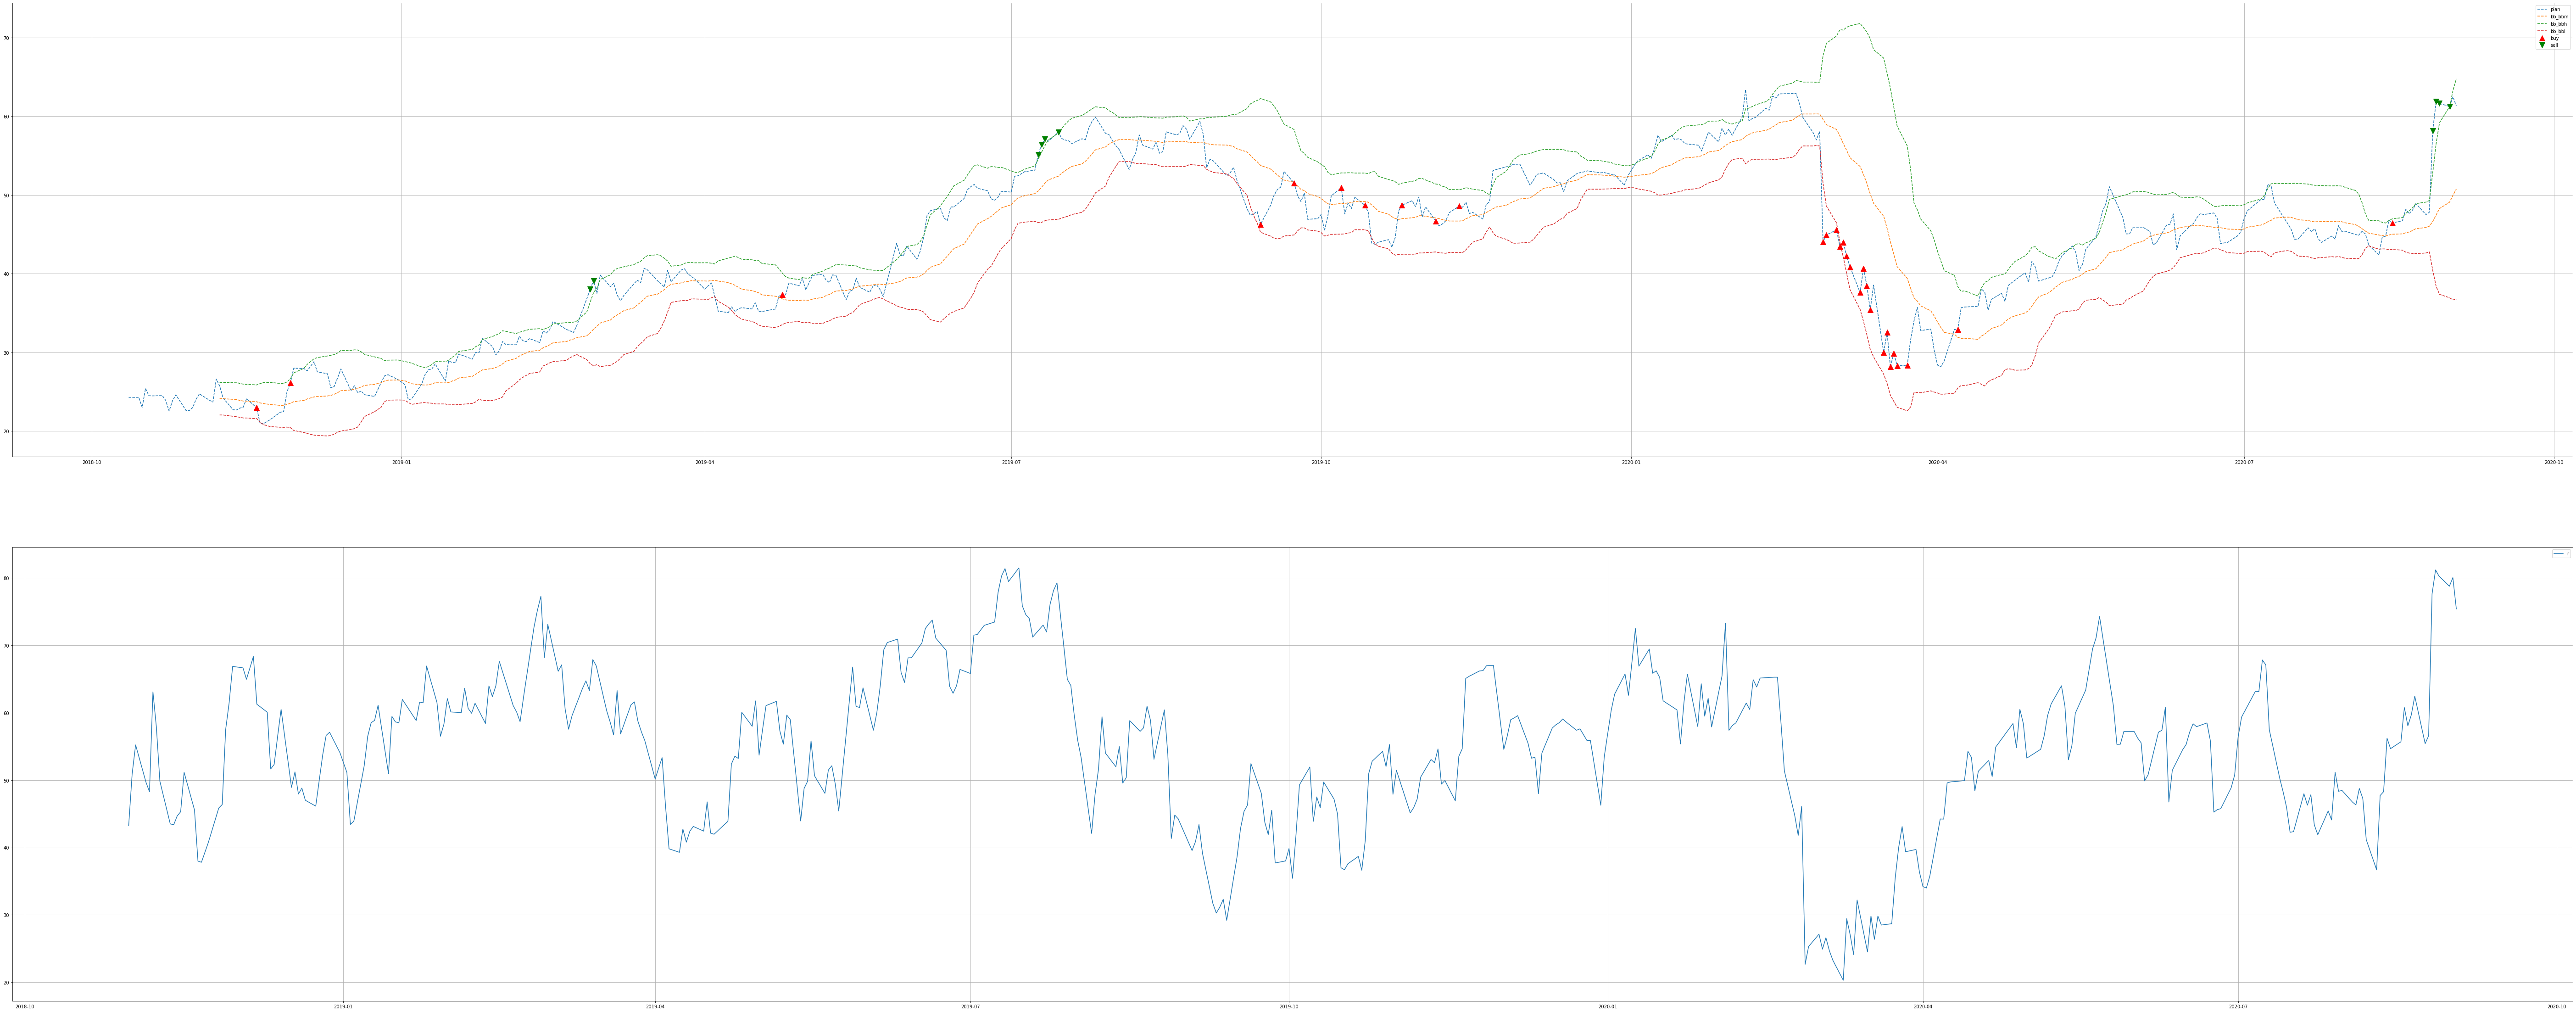

In [258]:
"""# Plot"""

plt.figure(figsize = (100, 40))
plt.subplot(211)
plt.plot(asset[[ name,'bb_bbm','bb_bbh','bb_bbl']], linestyle = "--")
plt.plot(asset[name][buy_signal], "r^", markersize = 12)
plt.plot(asset[name][sell_signal], "gv", markersize = 12)
plt.legend([ name,'bb_bbm','bb_bbh','bb_bbl','buy', 'sell'])
plt.grid(True)

plt.subplot(212)
plt.plot( asset["rsi"])
plt.legend('rsi')
plt.grid(True)


### Step 4: Backtesting
- I assume that we can only take a long position for the stock by one share.
    - This means that we sell our stock share after we buy it.
- If you want to take long and short positions in your strategy, replace this loop by the other mentioned in the lecture.

In [259]:
position = False 
asset['PV'] = 0.0 
turnover = 0 
for i,t in enumerate(asset.index):
  if not position: #if there isn't a position 
    payoff = 0 #buy item no profit
    asset['PV'].iloc[i] = asset['PV'].iloc[i -1] + payoff 

    if buy_signal[t]: 
      position = True
      turnover = turnover +1
      print(">" * 5, "Create a long position.")
      print("{} -> {:.2f} -> {:.2f}".format(t, asset[name][t], asset["PV"][t]))
  else: #there is a position 
    payoff = asset[name].iloc[i] - asset[name].iloc[i-1] #profit = today price - yesterday price 
    asset['PV'].iloc[i] = asset['PV'].iloc[i-1] + payoff #add profit 

    if sell_signal[t]: 
      position = False
      print("<" * 5, "Close a long position.")
      print("{} -> {:.2f} -> {:.2f}".format(t, asset[name][t], asset["PV"][t]))
print("Number of turnovers:", turnover)
     




>>>>> Create a long position.
2018-11-19 00:00:00 -> 22.97 -> 0.00
<<<<< Close a long position.
2019-02-26 00:00:00 -> 38.03 -> 15.06
>>>>> Create a long position.
2019-04-24 00:00:00 -> 37.37 -> 15.06
<<<<< Close a long position.
2019-07-09 00:00:00 -> 55.10 -> 32.79
>>>>> Create a long position.
2019-09-13 00:00:00 -> 46.27 -> 32.79
<<<<< Close a long position.
2020-08-26 00:00:00 -> 58.15 -> 44.67
Number of turnovers: 3


#### Max DD

In [260]:
asset["DD of our strategy"] = (asset["PV"] - asset["PV"].cummax()).cummin()
dd_idx = asset["DD of our strategy"].idxmin()

asset["buy&hold"] = asset[name].diff().cumsum()
asset["DD of buy&hold"] = (asset["buy&hold"] - asset["buy&hold"].cummax()).cummin()
dd_idx2 = asset["DD of buy&hold"].idxmin()

#### P&L

### Step 5: Performance Report

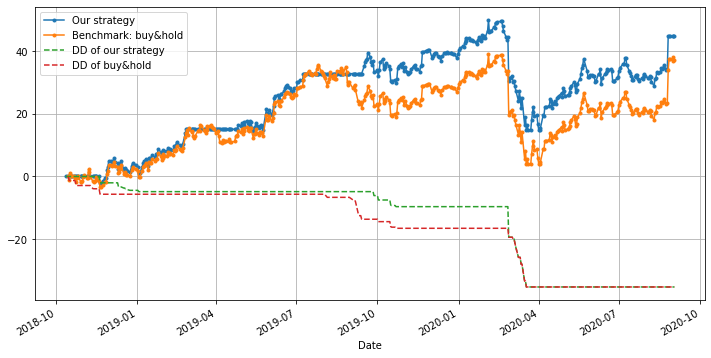

In [261]:
asset[["PV", "buy&hold"]].plot(style = ".-", grid = True, figsize = (12, 6))
ax = asset["DD of our strategy"].plot(style = "--", grid = True)
ax = asset["DD of buy&hold"].plot(style = "--", grid = True)
ax.legend(["Our strategy", "Benchmark: buy&hold", "DD of our strategy", "DD of buy&hold"])

### Conclusions
- You could make a conclusion about your strategy.
- Imagine that you are selling your strategy to your customers and convince them with your performance.

I created this stratgy to focuse on trading penny stock or minimizing loss. 
Strategy:
1.  It tries to deal with overreaction(Buy when RSI at min 30,and sell when max 75)
2. Aim to buy stock at it's bearish but upward trending phase, and to sell stock at it's overbought bullish phase. (By using MACD, and BBands)

Advantage: 
1.   For long term uptrend stock, close to buy/hold performance (ex: appl)
2.   For penny stocks/unpredictable stocks, it lowers the risk of money loss meanwhile gain money during upward trend (ex: plan, fcel, sdc)

Disadventage: 
1.   For stocks with extremely high growth (ex: tsla, amd). it has a very bad performance due to the prevention of overreation. 
2.    The turnoverrate is relatively low


# Reverse emotion trading

---


*   This is a simple project to test my curiosity. 

*   Is "be greedy when others are fearful" valid  in stock market? 

*   Holding based on fear and gread index. when people are fear, hold more stocks, vice versa. 








